In [78]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

# Practice: Data Analysis from start to end

Ideally and normally, process of **ad-hoc descriptive data analysis** would take **2-10 days**, based on the complexity of datasets and requirements. 

**Single, clean and small dataset** is easy and fast to analyze. Typical example of simple and fast analysis is **revenue/costs/profit analysis** for a given timeframe based on very few database tables. This process can be automatized well for further use.

**Complex analysis** consist of **combining internal and external datasets** and take longer. External datasets (downloaded from governement pages, through company API, bought from third parties, scraping given webpages) tend to be quite messy. Sometimes external datasets need to be created from scratch.

We will use single simple and relatively clean dataset to make the analysis doable in an afternoon timespan. But it is important to note, that **even this minimal data analysis example follows the same process and logic** as a project of larger scale. 

So let's get down to business!

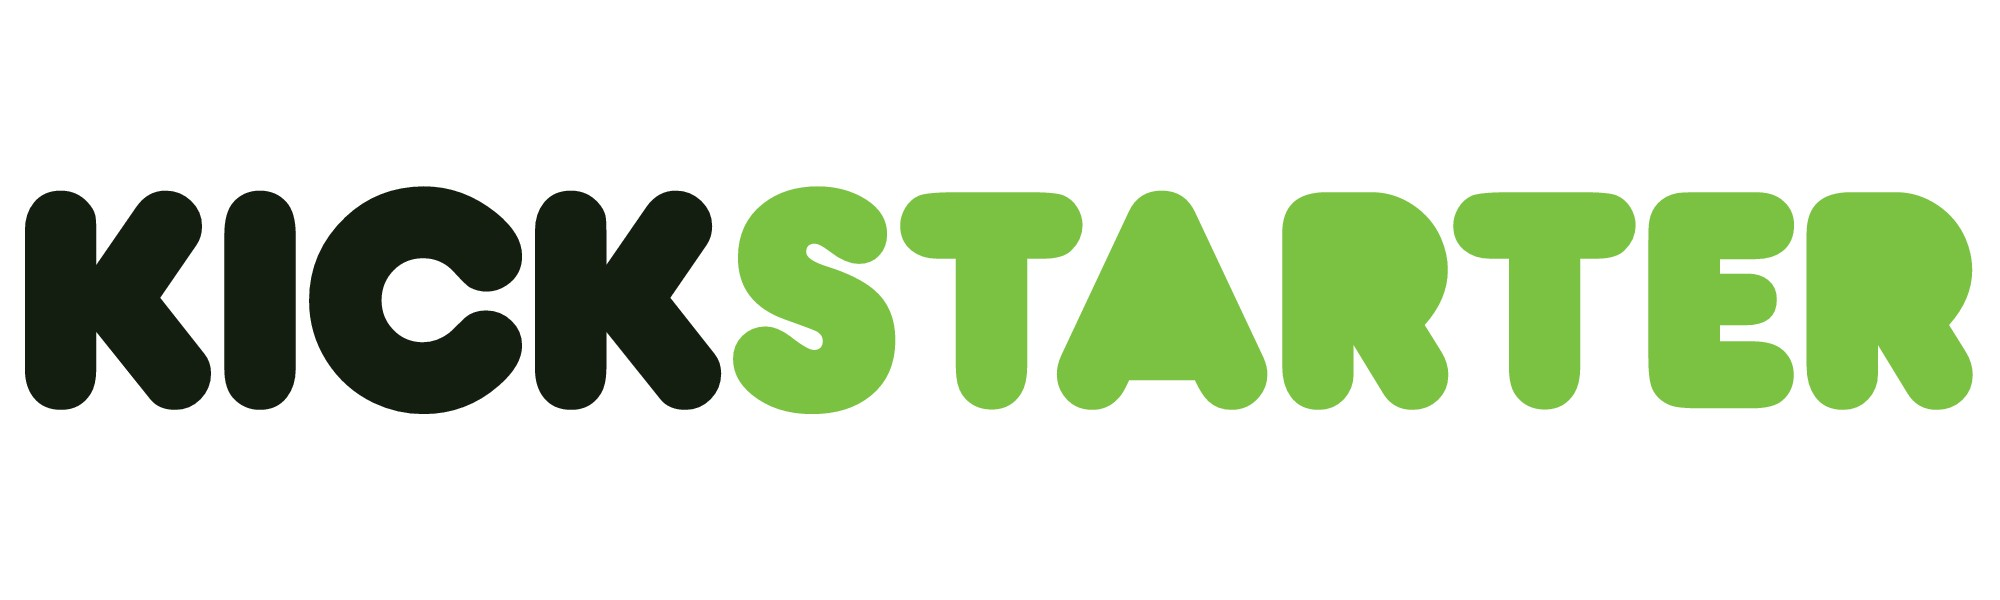

In [2]:
Image('http://media.indiedb.com/images/articles/1/211/210412/kickstarter-logo-whitebg.jpg')

###  0. Request from management, specification

Imagine you are working at a marketing company as a business analyst that takes care of internal databases, creates reports for management and automatizes the boring stuff. **At 17:15 Wednesday afternoon you get a following email:**

"
Hi Pista,

I stumbled upon an interesting dataset and I want you to take a look at it and prepare a short report for me. Do you know Kickstarter? Basically, it's a crowfunding website, where anybody can announce their own project for funding and if the funding is successful, the project is to be realized. It is quite modern now, and that is also the reason I want you to take a closer look at it. This is the webpage: [kickstarter](http://kickstarter.com) (The dataset is in the attachment). Most of the projects and users are from US, but it is a global webpage and anybody has access to it.

I'm mostly interested in things like: Do companies also use kickstarter or only private subjects? If both, what is the ratio between them? Are there people, that start multiple succesfull funds or it is not common? I'm of course also interested in what type of producst are sold this way, what type of industry is the most successful on kickstarter (fun, games, free time, culture, music, paintings, books, gadgets, etc.). I mean, try to do some segmentation of the market and success rates of the campaign based on this segmentation. Do you have in mind some other questions could be answered with this dataset?

I want to know, if we can advise our clients to use kickstarter in their campaigns to promote their new products and who is the target group that is successful in getting funds in crowdfunding campaigns. If there are some missing products from specific industry, I think it is a good signal, that kickstarter is not right place for them. And if there are some similar products from the same industry that are successful a lot, we can be sure, that kickstarter is the right method for getting promotion and funds for those kind of products.

Do you think you can prepare a draft for me by the end of this Friday?

Thanks

Filip


(Slovenska verzia:
Ahoj Pišta,

Narazil som na zaujímavý dataset a chcem aby si sa na to pozrel a pripravil mi k tomu krátky report. Poznáš Kickstarter? Je to v podstate crowfundingová webovka, kde si môže hocikto zadať zbierku na svoj projekt a keď sa mu zbierka podarí, tak projekt realizuje. Je to teraz celkom moderné a to je vlastne dôvod prečo chcem aby si sa na to bližšie pozrel. Tu je tá webová stránka: [kickstarter](http://kickstarter.com). Funguje to teda hlavne v Amerike, ale prístup je tam globálny.

Zaujíma ma hlavne ci to vyuzivaju aj nejake spolocnosti alebo len sukromne osoby, ci to niektori vyuziju aj viac krat ako raz a pritom su v kampani uspesni. Samozrejme ma zaujima, ake typy produktov sa takto predavaju, respektive z akeho odvetvia (zabava, priemysel, volny cas, kultura, hudba atd.). Proste nejaka segmentacia trhu a uspesnost kampane na zaklade tejto segmentacie. Napada ta nieco dalsie co by z toho datasetu slo vycitat? 
Chcem vediet, ci mozeme kickstarter odporucat aj nasim klientom pre ich nove produkty a kto je vlastne ta cielova skupina, ktora bude v crowdfundingu na kickstarteri uspesna. Ak tam nejake produkty chybaju z nejakeho odvetvia chybaju, tak je to podla mna jasny signal, ze kickstarter nie je pre nich. A ak sa tam nejake budu opakovat, tak je to signalom, ze je potrebne na tieto produkty hladat alternativne zdroje propagacie a financovania.

Myslis ze by si mi stihol pripravit nieco do piatku?

Diky

Filip)
"

But what do you do?

You reply:

Hi Filip,

thanks for the dataset, I just quickly went through it and it looks like a job for pandas!
Will talk to you about it tommorow morning, to set some specific goals of the analysis.

Bye
Pista

###  1. Draft of desired solution and outcomes

All right! The next day you talk to your manager and agree upon 3-4 feasible outcomes of the solution to be prepared for the analysis on Friday. These could be:

- Do companies also use kickstarter or only private subjects, if both, what is the ratio between them? 
- Are there people, that start multiple succesfull funds or it is not common? 
- What type of producst are sold this way, what type of industry is the most successful on kickstarter (fun, games, free time, culture, music, paintings, books, gadgets, etc.)
- segmentation of the market and success rates of the campaign based on this segmentation
- target group that is successful in getting funds in crowdfunding campaigns
- interesting findings during the process of analysis

### 2. a Read data into memory

In [4]:
os.getcwd();

In [5]:
os.chdir('..')

In [7]:
# go for it :)
ks = pd.read_csv('./Datasets/Kickstarter.csv', sep=';')
ks.head(3)

,Unnamed: 0,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,0,8782571.0,This is a card game for people who are into ki...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,1,6465690.0,"An unusually addicting, high-quality desk toy ...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,2,5408916.0,Bring Reading Rainbow’s library of interactive...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...


### 2. b Exploratory Data Analysis

The purpose of this step is to get familiar with the data at hand and see if some cleaning needs to be done.
- choose 3 functions to explore the data.
- choose 1 function to visualize some part of data and make a plot - histogram would be nice ~

In [8]:
# 1. exploratory function
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
Unnamed: 0          4000 non-null int64
amt.pledged         4000 non-null float64
blurb               3991 non-null object
by                  4000 non-null object
category            4000 non-null object
currency            4000 non-null object
goal                4000 non-null float64
location            4000 non-null object
num.backers         4000 non-null int64
num.backers.tier    4000 non-null object
pledge.tier         4000 non-null object
title               4000 non-null object
url                 4000 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 406.3+ KB


In [9]:
# 2. exploratory function
ks.describe()

,Unnamed: 0,amt.pledged,goal,num.backers
count,4000.000000,4.000000e+03,4.000000e+03,4000.000000
mean,1999.500000,2.899923e+05,6.175203e+04,3582.875750
std,1154.844867,7.119369e+05,1.266715e+05,7316.102809
min,0.000000,1.925000e+03,1.000000e+00,1109.000000
25%,999.750000,6.771300e+04,1.300000e+04,1406.750000
50%,1999.500000,1.205860e+05,3.000000e+04,1946.000000
75%,2999.250000,2.593680e+05,6.000000e+04,3372.000000
max,3999.000000,2.033899e+07,2.000000e+06,219382.000000


In [10]:
# 3. exploratory function
ks.isnull().sum()

Unnamed: 0          0
amt.pledged         0
blurb               9
by                  0
category            0
currency            0
goal                0
location            0
num.backers         0
num.backers.tier    0
pledge.tier         0
title               0
url                 0
dtype: int64

What is the difference between visualization for exploratory data analysis and visualization for presentation at the end of analysis?

Exploratory data analysis is for you as an analyst, while visualisation at the end is for wider public. Exploratory plots are quick and dirty and you create them to better understand what is hidden in data, while those for presentation take longer to create, pay more attention to detail. You should understand the dataset and know what you want to present by the end of analysis. You are just looking for an effective way of how to pass the hidden information still further. 

Approximately.

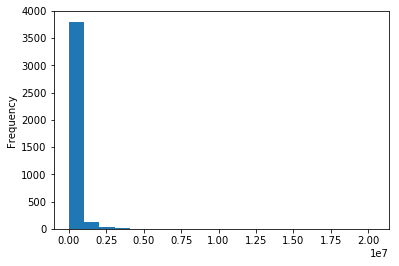

In [11]:
# 1. visualize data
ks['amt.pledged'].plot.hist(bins=20)

**Data exploration summary:**

Explain how you explored the dataset:

(make notes about data cleaniness, size of dataset, columns that are important for further analysis, distribution of values in specific column) 2-3whole sentences, english or czech is ok.

### 3. Data Cleaning

There are lots of things that can and should be done here. It is usually not done all at the beginning, but is iterative process and reflects our needs during the analysis. We will try these tasks here:
- create a deep copy of a table to not overwrite it
- convert to correct datatype columns that need to (you find out which :) )
- create a column with total backers
- create a column for average contribution by user
- etc.

**Deep Copy**
What is the difference between copy and deep copy?

standard (shallow) copy just points to the original data frame, while the deep copy makes physical copy of original dataframe in the memory. Deep copy is safer, because we won't accidentaly change values in original dataframe in case we wanted to take a step back and return to it.

In [12]:
# create a deep copy of pandas data frame
clean_ks = ks.copy(deep=True)

**Subset of columns:** We don't need all the columns for our analysis - remove the first unnamed column, the blurb and url columns.

In [13]:
cols_to_use = ['amt.pledged', 'by', 'category', 'currency', 'goal', 'location'
               , 'num.backers', 'num.backers.tier', 'pledge.tier', 'title']
clean_subset = clean_ks[cols_to_use]
clean_subset.head(3)

,amt.pledged,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title
0,8782571.0,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens
1,6465690.0,Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy
2,5408916.0,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev..."


**Renaming columns:** not only values, but also column names have to be clean. So let's rename them.

In [14]:
# but first, rename the columns, so instead of '.' between words in column names, we will use '_' 
# ex: 'pledge.tier' will be 'pledge_tier'

clean_subset.columns = clean_subset.columns.str.replace('.', '_')
clean_subset.columns

Index(['amt_pledged', 'by', 'category', 'currency', 'goal', 'location',
       'num_backers', 'num_backers_tier', 'pledge_tier', 'title'],
      dtype='object')

In [15]:
clean_subset.head(3)

,amt_pledged,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title
0,8782571.0,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens
1,6465690.0,Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy
2,5408916.0,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev..."


In [17]:
# also, rename the column 'by' to column 'author'
clean_subset = clean_subset.rename(columns={'by': 'author'})
clean_subset.head(3)

,amt_pledged,author,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title
0,8782571.0,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens
1,6465690.0,Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy
2,5408916.0,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev..."


**New columns:** Most of the times, we will create new columns to capture our needs during the analysis.

In [18]:
# convert to correct datatype columns that need to (you find out which, there is one :) )
clean_subset['amt_pledged'] = clean_subset['amt_pledged'].astype('float')
type(clean_subset['amt_pledged'][0])

numpy.float64

In [ ]:
# It doesn't work? try replacing the float delimiter first. Use the same logic as when we were renaming columns
# clean_subset['col_name'] = # put it here

In [19]:
# create a column for average contribution by user
clean_subset['avg_contribution'] = clean_subset['amt_pledged'] / clean_subset['num_backers']
clean_subset.head(3)

,amt_pledged,author,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,avg_contribution
0,8782571.0,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,40.033234
1,6465690.0,Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,41.734054
2,5408916.0,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",51.096441


### Advanced problems

#### Converting all amounts to one common currency

In [ ]:
pd.DataFrame.idxmax??

In [20]:
# there is more than 1 currency used, but we would like to make the amount comparable,
# so convert it all to the currency that is the most common
most_common_currency = clean_subset['currency'].groupby(clean_subset['currency']).count()
# translate to python: group by currency, count frequency, use .idxmax() in the end
most_common_currency

currency
aud      52
cad     128
chf       3
dkk       7
eur      96
gbp     252
nzd      10
sek      14
usd    3438
Name: currency, dtype: int64

In [21]:
most_common_currency.idxmax()

'usd'

**1. Solution:** Create a currency table and join on original table

In [22]:
# you're all alone here :) 
# resulting data frame should contain 2 new columns: conversion rates for each currency, converted amount in USD
currencies = ['usd', 'sek', 'nzd', 'gbp', 'eur', 'dkk', 'chf', 'cad', 'aud']
conversion = [1.00, 0.13, 0.71, 1.30, 1.19, 0.16, 1.04, 0.80, 0.79]

In [23]:
conversion_rates = [ ('currency', currencies),
                     ('conversion_rate', conversion) ]
conversion_table = pd.DataFrame.from_items(conversion_rates)
conversion_table

,currency,conversion_rate
0,usd,1.00
1,sek,0.13
2,nzd,0.71
3,gbp,1.30
4,eur,1.19
5,dkk,0.16
6,chf,1.04
7,cad,0.80
8,aud,0.79


In [54]:
pd.merge??

In [35]:
clean_currencies = pd.merge(clean_subset, conversion_table, on='currency')
clean_currencies[clean_currencies['currency'] != 'usd'].tail(3)

,amt_pledged,author,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,avg_contribution,conversion_rate
3997,530792.0,FLINK,Product Design,chf,80000.0,"Zurich, Switzerland",2045,"[78, 79, 20, 112, 30, 9, 100, 46, 60, 100, 196...","[1.0, 158.0, 178.0, 188.0, 198.0, 213.0, 228.0...","Slicks Travel System: One Backpack, Limitless ...",259.555990,1.04
3998,53862.0,Stuck In Attic,Video Games,chf,39270.0,"Targu Mures, Romania",1929,"[62, 365, 834, 81, 31, 191, 16, 49, 56, 92, 60...","[1.04, 9.0, 15.0, 20.0, 20.0, 25.0, 30.0, 35.0...",Gibbous - A Cthulhu Adventure,27.922240,1.04
3999,247688.0,Scrona,Technology,chf,125000.0,"Zurich, Switzerland",1435,"[51, 22, 50, 99, 308, 50, 100, 702, 9, 8, 1, 1...","[5.0, 25.0, 106.0, 121.0, 136.0, 146.0, 161.0,...",\xb5Peek - The Professional Microscope that Fi...,172.604878,1.04


In [36]:
clean_currencies['usd_pledged'] = clean_currencies['amt_pledged'] * clean_currencies['conversion_rate']
clean_currencies.head(3)

,amt_pledged,author,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,avg_contribution,conversion_rate,usd_pledged
0,8782571.0,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,40.033234,1.0,8782571.0
1,6465690.0,Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,41.734054,1.0,6465690.0
2,5408916.0,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",51.096441,1.0,5408916.0


**2. Solution:** Define a lookup function and use map function on a series to create a new column with conversion rates.

In [37]:
# you're all alone here :)
# resulting data frame should contain 2 new columns: conversion rates for each currency, converted amount in USD
 # use series.map(lookup function) to series

**Correction of avg_contribution**

In avg_contribution, we have value in original currencies, while we want it to be USD only. So let's overwrite the column.

In [39]:
clean_currencies['avg_contribution'] = clean_currencies['usd_pledged'] / clean_currencies['num_backers']

#### Country of project

In [40]:
# get value behind the last comma in the column location and trim off the left space in the resulting string. regex somebody?
# or create a list of elements in location. Elements are split by coma
country_list = clean_currencies['location'].str.split(',')
# strip is needed, because the country contains space on the left side of string
country_list[0][-1].strip()

'CA'

In [41]:
clean_currencies['country'] = country_list.map(lambda x: x[-1].strip())
clean_currencies.head(3)

,amt_pledged,author,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,avg_contribution,conversion_rate,usd_pledged,country
0,8782571.0,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,40.033234,1.0,8782571.0,CA
1,6465690.0,Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,41.734054,1.0,6465690.0,CO
2,5408916.0,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",51.096441,1.0,5408916.0,CA


### Data cleaning summary

Explain in 3 sentences how you cleanded the data: what you changed, what you added and why:

### 4. Clean Data Processing

Aim of this step is answering problem questions, hypotheses, solving the problem at hand, getting the job done...

We should have clean and reliable dataset at this step, that is easy to work with.
In each window, create a separate dataframe that will be further used in step 5. - visualizations.

In [42]:
# Do companies also use kickstarter or only private subjects, if both, what is the ratio between them?
oh_snap = # you can try this at home with male and female names provided
# http://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/male.txt
# http://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/female.txt

SyntaxError: invalid syntax (<ipython-input-42-74e000dd450b>, line 2)

Oh Snap, we don't have a column, that says if the observation is company or private person!
Do you have some idea on how to recognize if author is a company or private person 
other than manually checking every observation and deciding?

In [43]:
# count frequency of original currency used in projects
most_common_currency.sort_values(ascending=False)

currency
usd    3438
gbp     252
cad     128
eur      96
aud      52
sek      14
nzd      10
dkk       7
chf       3
Name: currency, dtype: int64

Notice, that if you use **df[[col]]** to select subset of dataframe even with one column, the result is **DataFrame**,
while if you use **df[col]** to select single column, the result is a **Series**.

In [44]:
# Are there people, that start multiple succesfull funds or it is not common?
# yep, we can answer this, use groupby
multiple_campaigns = clean_currencies[['author']].groupby(
    clean_currencies['author']).count().sort_values(by='author', ascending=False)
type(multiple_campaigns)

pandas.core.frame.DataFrame

In [45]:
multiple_campaigns[multiple_campaigns['author'] > 1].sum()

author    1324
dtype: int64

In [46]:
more_than_one = len(multiple_campaigns[multiple_campaigns['author'] > 1])
more_than_one

461

In [47]:
more_than_one/len(multiple_campaigns)

0.14695569014982468

In [48]:
461/((4000-1324)+461)

0.14695569014982468

In [52]:
# What type of products are sold this way, what type of industry is the most successful on kickstarter 
# (fun, games, free time, culture, music, paintings, books, gadgets, etc.)
industry_frequency = clean_currencies[['category']].groupby(
    clean_currencies['category']).count().sort_values(by='category', ascending=False)
industry_frequency

,category
category,
Product Design,773
Tabletop Games,742
Video Games,524
Hardware,182
Technology,152
Documentary,124
Gadgets,121
Design,99
Comics,79


In [53]:
top30_industry = industry_frequency[0:30]
top30_industry

,category
category,
Product Design,773
Tabletop Games,742
Video Games,524
Hardware,182
Technology,152
Documentary,124
Gadgets,121
Design,99
Comics,79


In [54]:
# segmentation of the market and average funding for a backer
avg_back_industry = clean_currencies[['category', 'avg_contribution']].groupby(
    clean_currencies['category']).mean().sort_values(by='avg_contribution', ascending = 0)
avg_back_industry

,avg_contribution
category,
Sculpture,288.711141
Flight,287.927413
3D Printing,217.521195
Gaming Hardware,209.945873
Camera Equipment,201.876634
Mixed Media,176.290827
Robots,170.456438
Sound,150.753968
Interactive Design,144.522658


In [57]:
# target group that is successful in getting funds in crowdfunding campaigns 
category_sum = clean_currencies[['category', 'usd_pledged']].groupby(
    clean_currencies['category']).sum().sort_values(by='usd_pledged', ascending=0)
# Tip - use different aggragation function than before
category_sum

,usd_pledged
category,
Product Design,2.778644e+08
Tabletop Games,2.002856e+08
Video Games,1.444163e+08
Hardware,6.918204e+07
Technology,6.259257e+07
Gadgets,3.319412e+07
Wearables,2.863039e+07
Design,2.092301e+07
Sound,2.032391e+07


In [ ]:
# interesting findings during the process of analysis

In [61]:
# count frequency of countries if you got them from the location column
ks_countries = clean_currencies['country'].groupby(clean_currencies['country']).count().sort_values(ascending=False)
len(ks_countries)

110

#### Data processing summary

Explain in 2-3 sentences how you processed the data, what did you find out. (Don't write summary of the whole analysis yet, it will be done after visualization of results)

### 5. Results visualization

As the name suggests, meaning of this step is to visualize our results to our audience for easier grasp. Human mind is better with pictures than with numbers :) We can detect outliers this way, follow the distribution of values in dataset, compare different groups in dataset or follow trends in our dataset when doing timeseries analysis.

We usually want to highlight the important information in our visualizations. These plots are created with presentation of results to audience in mind. That is the big difference between exploratory plots during the analysis and results plots of the final analysis.

** Try to use the dataframes you created in previous step **

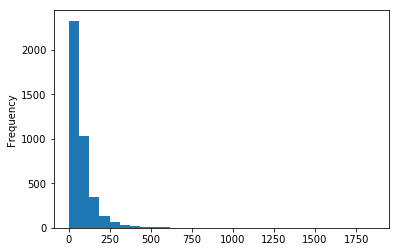

In [72]:
# create one histogram (shows distribution of 1 value and puts similar values in the same bin. 
# The more values in one bin, the bigger the bin is)
# Example: frequency of average funding size per backer in a project
clean_currencies['avg_contribution'].plot.hist(bins = 30)

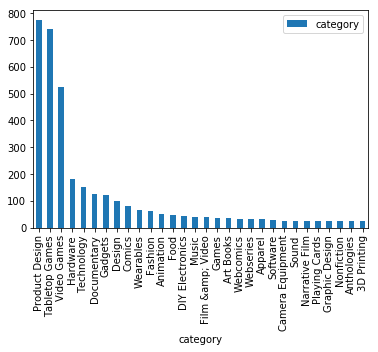

In [89]:
# one barplot (has few categories at x axis and one value for each category at y axis)
# Example category of industry and their counts
top30_industry.plot.bar()

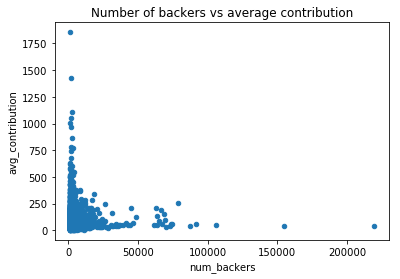

In [92]:
# one scatterplot (has x and y as numeric values and shows each observation as a point)
# Example: amount pledged vs total number of backers, or even better num_backers vs avg_contribution
contrib_scat = clean_currencies[['num_backers', 'avg_contribution']].plot.scatter(x='num_backers', y='avg_contribution',
                                                                                title='Number of backers vs average contribution')

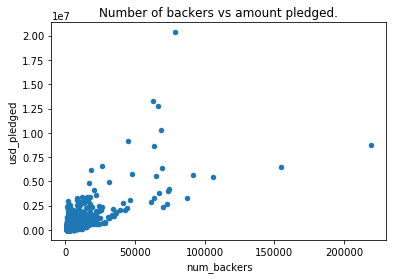

In [94]:
pledge_scat = clean_currencies[['num_backers', 'usd_pledged']].plot.scatter(x='num_backers', y='usd_pledged',
                                                                                title='Number of backers vs amount pledged.')

**Advanced problem - boxplot**

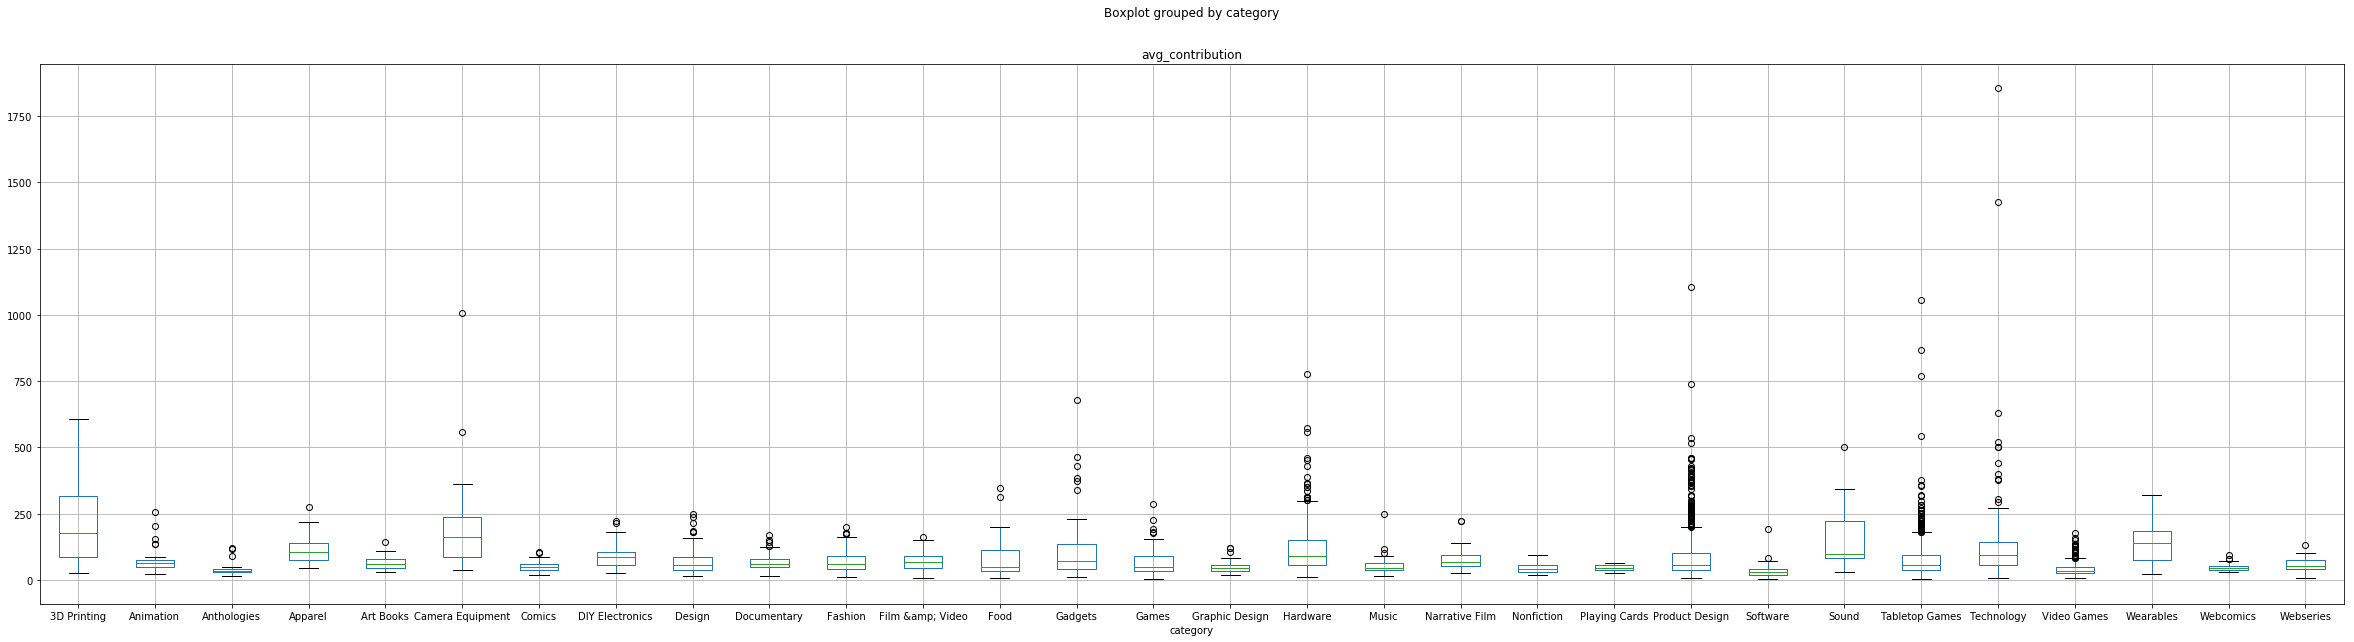

In [112]:
# anything additional you like and want to share :) Boxplots are really cool!
# boxplots are like barplots that use a category and numerical value 
# Instead of just 1 number per category, boxplots use all the values to create a specific box for each category
# Or you could tell that it is a scatterplot for categories that has nice properties shown (quantiles, median, outliers)
top30_industries_list = top30_industry.index.values.tolist()
indus_box = clean_currencies[clean_currencies['category'].isin(
                    top30_industries_list)].boxplot(column='avg_contribution', by='category',
                                                    figsize=(40, 10), fontsize=10)

Note: when you open this plot as a file offline from your folder, it is readable without problems.

In [113]:
# Save the plot into file as png
fig = indus_box.get_figure()
fig.savefig('industry_avgcontributions_boxplot.png', bbox_inches='tight')

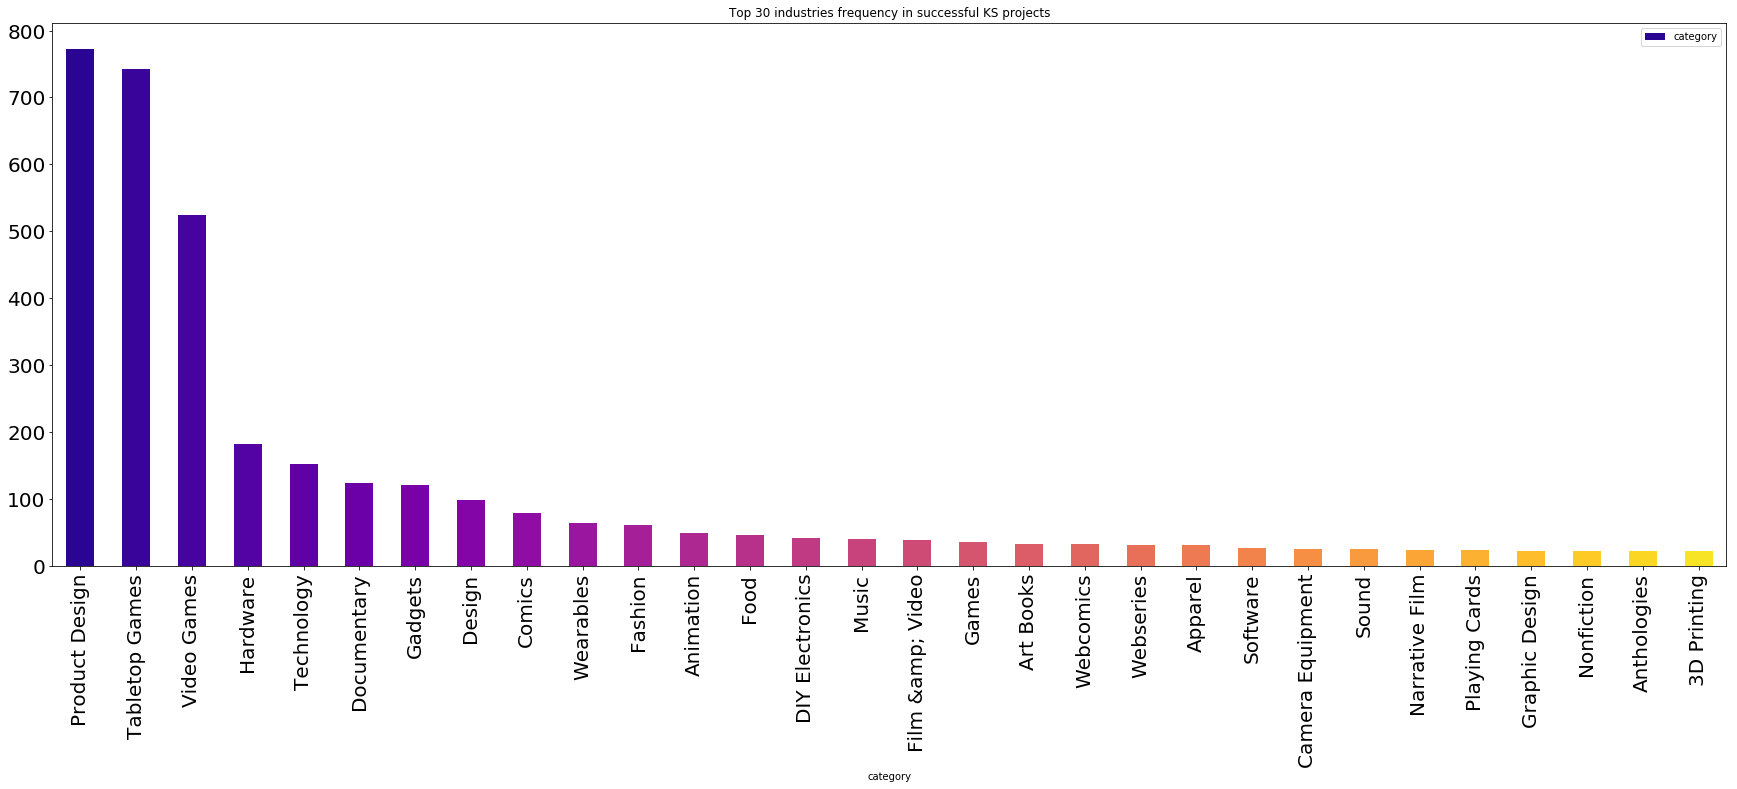

In [117]:
# Make either scatter plot or barplot more visually engagind
# use color to emphasize important information that you want to communicate to your audience
indus_colors = cm.plasma(np.linspace(0.05,0.95,len(top30_industry)))
indus_bar = top30_industry.plot.bar(figsize=(30, 10), fontsize=20, color=indus_colors, 
                                    title='Top 30 industries frequency in successful KS projects')

In [88]:
# Save the plot into file as png
fig = indus_bar.get_figure()
fig.savefig('industry_frequency_barplot.png', bbox_inches='tight')

### 6. Saving results, rerunning script, script cleaning

To rerun the script with the same results is needed for the analysis to be reproducible. We can test it like this:

kernel -> restart and run all

It helps us clean the script of redundant parts (when it stops at some point because of error).

After the end of analysis we save the results as new files or load the resulting tables into database.

We will create an excel file with pictures attached:

In [116]:
# to save to excel is as easy as to csv with the difference, that you can use multiple sheets in one file
writer = pd.ExcelWriter('Kickstarter_analysis.xlsx')
avg_back_industry.to_excel(writer, sheet_name='avg_back_industry')
category_sum.to_excel(writer, sheet_name='category_sum')
writer.save()

Save table to csv with semicolon separator.

In [96]:
category_sum.to_csv('Kickstarter_category_sum.csv', sep=';')

### 7. Final Report for Management

Write an email for the management that summarises your analyses. (4-8 sentences)

Explain what is in excel file that you are sending as an attachment, what to pay attantion to.

Which questions were you able to answer and how?

How confident are you in the results you are providing?

Are there some limitations of this dataset that could be solved by providing additional data source(s)?